    year    lifeExp           pop     gdpPercap
0   1952  49.057620  1.695040e+07   3725.276046
1   1957  51.507401  1.876341e+07   4299.408345
2   1962  53.609249  2.042101e+07   4725.812342
3   1967  55.678290  2.265830e+07   5483.653047
4   1972  57.647386  2.518998e+07   6770.082815
5   1977  59.570157  2.767638e+07   7313.166421
6   1982  61.533197  3.020730e+07   7518.901673
7   1987  63.212613  3.303857e+07   7900.920218
8   1992  64.160338  3.599092e+07   8158.608521
9   1997  65.014676  3.883947e+07   9090.175363
10  2002  65.694923  4.145759e+07   9917.848365
11  2007  67.007423  4.402122e+07  11680.071820


Text(0, 0.5, 'Average Life Expectancy (Years)')

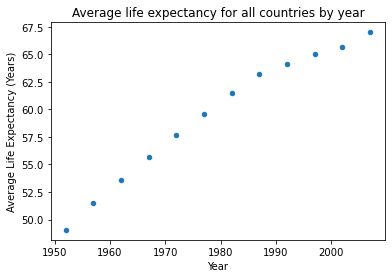

In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

data = pd.read_csv("gap.tsv", sep='\t')

## PART 1 EXERCISE 1
# Get average life expectancy by grouping by year
mean_life = data.groupby(by=["year"]).mean()
mean_life = mean_life.reset_index()
print(mean_life.head(20))

# Make the scatter plot for averaged life expectancy across all countries for each year
df1 = mean_life.plot.scatter(y='lifeExp', x = 'year', title = 'Average life expectancy for all countries by year')
df1.set_xlabel('Year')
df1.set_ylabel('Average Life Expectancy (Years)')

# PART 1 QUESTION 1
# Yes, life expectancy is increasing across time. The increasing trend appears mostly linear with a downward slope. 


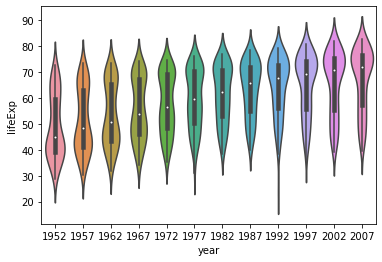

In [2]:
# Create violin plot across countries for years(x-axis) vs life expectancy (y-axis)
df2 = sb.violinplot(x='year', y='lifeExp', data=data)

# PART 1 QUESTION 2
# The distribution of life expectancy across countries appears to be right skewed for the first 15 years up until 1967. After 1972, the life expectancies shift and appear more left skewed and this effect seems to stabilize until 2007, with 1992 having much lower life expectancy outliers. The data for years 1952 to 1972 appear bimodal while the other years are for the most part unimodal and clearly skewed in one direction. The year 1972 might have the most symmetry in terms of the median and its distribution, for the most part the values are skewed either to the left or right. 

# PART 1 QUESTION 3
# We would most likely reject the null hypothesis of no relationship, meaning there is probably a relationship or positive correlation between years and life expectancy. This seems likely since the mean life expectancy increases with the increase in time. 

# PART 1 QUESTION 4
# If we plotted the residuals from the linear regression model of life expectancy vs. year, against year and made a violin plot of each residual, we would see that the values of life expectancy are distributed around 0 mean and there would be a linear relationship maintained as before. This is because a residual value is the difference between expected value (from the regression model) and observed value. Other then this centering around 0 for life expectancy, the skews, modality and trends in the data will remain the relatively the same. 

## Part 1 Question 5
# The violin plot should have centering around 0 with a normal distribution of error that is independent of any predictor (such as year), as well as linearity. It appears that this violin plot is normally distributed and follows a linear trend.  



Model Coefficient of Determination:  0.9725076576455212
Model:  -585.6521874415445  +  0.32590382763715164 *x


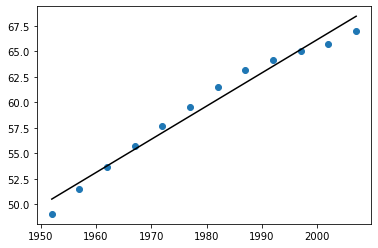

In [3]:
# PART 1 EXERCISE 2
# Extract year and life expectancy columns from data
years = mean_life["year"]
lifeExp = mean_life["lifeExp"]
# Convert year array into 2D array
years = np.array([[h] for h in years])

# Fit regression line to model
model = linear_model.LinearRegression().fit(years, lifeExp)

# Make the plot and print coeficeint 
plt.scatter(years, lifeExp)
# Plot the model
plt.plot(years, model.predict(years), color = 'k')
# Print out the model coefficient and the regression model formula 
print('Model Coefficient of Determination: ', model.score(years, lifeExp))
print('Model: ', model.intercept_, ' + ', model.coef_[0], '*x')


In [4]:
# PART 1 QUESTION 6 
# On average, life expectancy increases by about 0.326 years every year (the slope of the fit) around the world. 

# PART 1 QUESTION 7
# We do reject the null hypothesis of no relationship, there is clearly a positive correlation between increasing year and average global life expectancy. This is confirmed by the p-value being well below 0.05 shown below with the linear regression package statistics.  

# Get p-value to confirm we can reject null hypothesis
from scipy import stats
stats.linregress(mean_life["year"], mean_life["lifeExp"])

LinregressResult(slope=0.3259038276371517, intercept=-585.6521874415446, rvalue=0.9861580287385594, pvalue=3.910160900774233e-09, stderr=0.017328015110808594)

          country continent  year  lifeExp       pop   gdpPercap  Predicted  \
0     Afghanistan      Asia  1952   28.801   8425333  779.445314  50.512084   
1     Afghanistan      Asia  1957   30.332   9240934  820.853030  52.141603   
2     Afghanistan      Asia  1962   31.997  10267083  853.100710  53.771122   
3     Afghanistan      Asia  1967   34.020  11537966  836.197138  55.400642   
4     Afghanistan      Asia  1972   36.088  13079460  739.981106  57.030161   
...           ...       ...   ...      ...       ...         ...        ...   
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306  61.918718   
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786  63.548237   
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960  65.177756   
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623  66.807275   
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298  68.436795   

       Residual  
0    -21.711084  
1    -21.809603

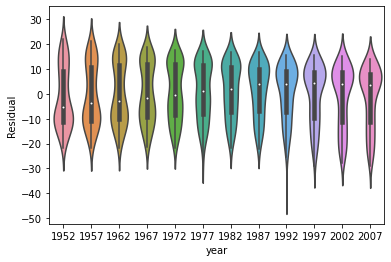

In [5]:
# PART 1 EXERCISE 3
# Calculate the predicted value based on the linear regression model above
data['Predicted'] = ((data.year)*.32590382763715164) - 585.6521874415445
# Calculate the residual value of expected minus predicted life expectancy
data['Residual'] = data.lifeExp - data.Predicted
# Display some of the calculated residuals
print(data)
# Create the violin plot for residuals vs year. 
df3 = sb.violinplot(x='year', y='Residual', data=data)


In [6]:
# PART 1 QUESTION 8
# Yes, the plot seems to fit expectations in terms of residuals being centered around 0 and maintaining the linear trend and distribution of error. 



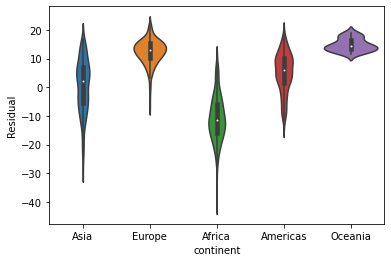

In [7]:
# PART 1 EXERCISE 4
# Create a violin plot of residuals versus continent
df4 = sb.violinplot(x='continent', y='Residual', data=data)

# PART 1 QUESTION 9
#  There does appear to be some dependence between continent and model residual, this is suggested by the fact that not all continents have a residual of 0, meaning that each continent's fit to the linear regression of life expectancy across time is varied depending on what country we are looking at - so some countries fit the model better than others. This suggests that a regression analysis of life expectancy across time will be more accurate and have a better fit than others, such as Asia for instance, whose residuals center around 0 the closest. This makes sense since some countries will better match the overall global average trend in life expectancy while outliers may be following their own trend in life expectancy. 

Africa
Model Coefficient of Determination:  0.9194515426546266
Model:  -524.2578460686752  +  0.28952926304464777 *x


Americas
Model Coefficient of Determination:  0.9893567924476555
Model:  -663.1062932494176  +  0.3676509370629372 *x


Asia
Model Coefficient of Determination:  0.9837428138954546
Model:  -836.8908952860058  +  0.4531224038991306 *x


Europe
Model Coefficient of Determination:  0.9795077359678083
Model:  -367.41099397047356  +  0.22193214452214433 *x


Oceania
Model Coefficient of Determination:  0.9725241196344985
Model:  -341.907963170163  +  0.21027237762237752 *x




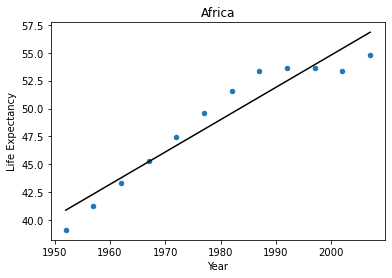

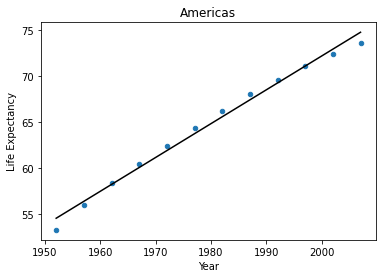

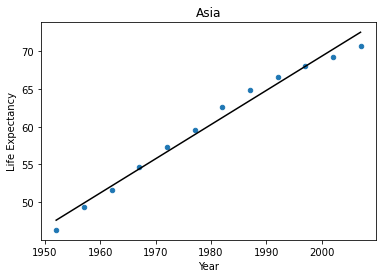

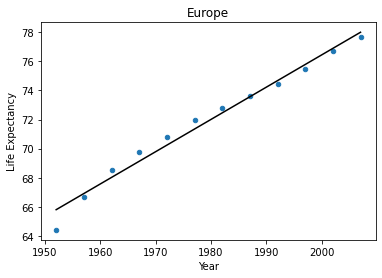

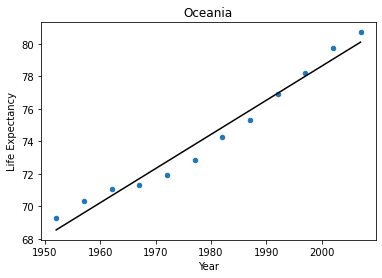

In [8]:
# PART 1 EXERCISE 5

# This helper function receives a dataframe for a continent and the title of the continent and makes a scatter plot with regression line
def makeFig(ef, title1): 
    #print(ef)
    # Create the scatter plots for each of the 5 time periods using standardized payroll (x axis) and percent wins (y axis)
    e1 = ef.plot.scatter(x='year', y='lifeExp', title = title1)
    e1.set_xlabel('Year')
    e1.set_ylabel('Life Expectancy')
    
    # Extract data for the regression model below
    years = ef["year"]
    lifeExp = ef["lifeExp"]
    # Convert year array into 2D array
    years = np.array([[h] for h in years])

    # Fit regression line to model
    model = linear_model.LinearRegression().fit(years, lifeExp)
    e1.plot(years, model.predict(years), color = 'k')
    print(title1)
    # Print the coefficient and model for each country
    print('Model Coefficient of Determination: ', model.score(years, lifeExp))
    print('Model: ', model.intercept_, ' + ', model.coef_[0], '*x')
    print('\n')

    
# Group by year and continent to plot life exp vs year for each continent
cont = data.groupby(by=["continent", "year"]).mean()
# reset the grouping index
cont = cont.reset_index()
#print(cont)

# Split the  dataframe std_periods into 5 dataframes, one corresponding to each time period
dfs = [x for _, x in cont.groupby(by=["continent"])] 
# For each continent in dfs, loop and make a figure with regression line for each
for df in dfs: 
    makeFig(df, df.iloc[0, 0])



In [9]:
# PART 1 QUESTION 10
# Yes, the regression model should include an interaction term for continent and year. This is because a linear regression model was created for datasets from each continent and a regression line was fitted to continental data. There is variation between the slopes for the models between continents that is reflected in the continental plots of residuals from Exercise 4.  



In [10]:
# PART 1 EXERCISE 6
from sklearn.preprocessing import PolynomialFeatures

# Create a key-value table to look up numeric values to convert for continent
dat = (['Africa',1],['Americas',2],['Asia',3],['Europe',4], ['Oceania',5])
continent_table = pd.DataFrame(dat, columns = ['continent', 'Value'])
# Merge the cont dataframe so that it includes numeric values for continents in the Value column
continent_data = cont.merge(continent_table, on='continent', how='left')
# Rename Value column to ContCode
continent_data.rename(columns = {'Value':'ContCode'}, inplace=True)
# Clean up dataframe
continent_data = continent_data.drop(['Predicted','Residual'], axis=1)

# Prepare the x and y data for a polynomialFeatures model with x_interaction
X = continent_data.drop(['continent','pop','gdpPercap','lifeExp'], axis=1)
Y = continent_data['lifeExp']
# Generate interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
# Insert terms into dataframe
inter_df = pd.DataFrame(x_interaction, columns = ['year', 'ContCode', 'year:ContCode'])
# Create the new model with interactions
inter_model = linear_model.LinearRegression().fit(inter_df, Y)
# Print out the model and respective coefficients
print('Model: ', inter_model.intercept_, ' + ', inter_model.coef_[0], '*x1 + ', inter_model.coef_[1], '*x2 + ', inter_model.coef_[2], '*x1x2')



Model:  -744.8333178716474  +  0.3997711942458224 *x1 +  66.03950650759047 *x2 +  -0.03042325633853693 *x1x2


In [11]:
continent_table

,continent,Value
0,Africa,1
1,Americas,2
2,Asia,3
3,Europe,4
4,Oceania,5


In [12]:
# PART 1 QUESTION 11
# All parameters appear to be significantly different from 0. The last parameter for the interaction between year and continent is very close to 0, but it ends up making a difference in the predictive power of the model condsidering that year is in the thousands and is multiplied by a numeric value for continent for the x1x2 interaction.

# PART 1 QUESTION 12
def pred_increase(continent, contcode):
    # Parameters from model
    intercept = -744.8333178716474
    year_x = 0.3997711942458224
    contcode_x = 66.03950650759047
    interaction_x = -0.03042325633853693
    # Set start and end year values used to get an average life expectancy growth in 100 years
    startyear = 1900
    endyear = 2000
    # Apply the formula passed in as intercept and slope to endyear and startyear
    start_age = intercept + year_x*startyear + contcode_x*contcode + interaction_x*(contcode*startyear)
    end_age = intercept + year_x*endyear + contcode_x*contcode + interaction_x*(contcode*endyear)
    # Calculate the difference between model predictions for start and end years, and divide by 100 years to get a rate of change in lifeExp per year
    dif = end_age - start_age
    result = dif/100
    print("{}'s Life Expectancy Increase Per Year: {}".format(continent,result))
    
# The following code uses the linear regression model including a term for interaction between year and continent from exercise 6
pred_increase('Africa', 1)
pred_increase('America',2)
pred_increase('Asia',3)
pred_increase('Europe',4)
pred_increase('Oceania',5)

Africa's Life Expectancy Increase Per Year: 0.36934793790728576
America's Life Expectancy Increase Per Year: 0.33892468156874883
Asia's Life Expectancy Increase Per Year: 0.3085014252302119
Europe's Life Expectancy Increase Per Year: 0.27807816889167497
Oceania's Life Expectancy Increase Per Year: 0.24765491255313804


In [13]:
# PART 1 EXERCISE 8
# Merge the data dataframe so that each continent has a numeric value as done before on a grouped version of the dataframe
data = data.merge(continent_table, on='continent', how='left')
# Rename Value column to ContCode
data.rename(columns = {'Value':'ContCode'}, inplace=True)

# The code below basically calculates the interaction terms for the original dataset (before it was grouped) to allow us to calculate residuals with this new model
# Prepare the x and y data for a polynomialFeatures model with x_interaction
X = data.drop(['country','continent','pop','gdpPercap','lifeExp', 'Predicted','Residual'], axis=1)
Y = data['lifeExp']
# Generate interaction terms for the main dataframe
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)
# Insert terms into dataframe
tempdf = pd.DataFrame(x_interaction, columns = ['year', 'ContCode', 'year:ContCode'])
# Copy over the interaction data to the main dataframe
data['interaction'] = tempdf['year:ContCode']
print(data.head(5))



       country continent  year  lifeExp       pop   gdpPercap  Predicted  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314  50.512084   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030  52.141603   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710  53.771122   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138  55.400642   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106  57.030161   

    Residual  ContCode  interaction  
0 -21.711084         3       5856.0  
1 -21.809603         3       5871.0  
2 -21.774122         3       5886.0  
3 -21.380642         3       5901.0  
4 -20.942161         3       5916.0  


       country continent  year  lifeExp       pop   gdpPercap  Predicted  \
0  Afghanistan      Asia  1952   28.801   8425333  779.445314  55.479984   
1  Afghanistan      Asia  1957   30.332   9240934  820.853030  57.022491   
2  Afghanistan      Asia  1962   31.997  10267083  853.100710  58.564998   
3  Afghanistan      Asia  1967   34.020  11537966  836.197138  60.107505   
4  Afghanistan      Asia  1972   36.088  13079460  739.981106  61.650012   
5  Afghanistan      Asia  1977   38.438  14880372  786.113360  63.192519   
6  Afghanistan      Asia  1982   39.854  12881816  978.011439  64.735026   
7  Afghanistan      Asia  1987   40.822  13867957  852.395945  66.277534   
8  Afghanistan      Asia  1992   41.674  16317921  649.341395  67.820041   
9  Afghanistan      Asia  1997   41.763  22227415  635.341351  69.362548   

    Residual  ContCode  interaction  
0 -26.678984         3       5856.0  
1 -26.690491         3       5871.0  
2 -26.567998         3       5886.0  
3 -26.08750

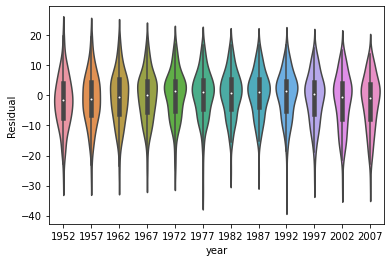

In [14]:
# Calculate the predicted value based on the linear regression model with interaction from above, overwriting the previous dataframe columns for residual calculation
data['Predicted'] = (data.year*0.3997711942458224) + (data.ContCode*66.03950650759047) + (data.interaction*(-0.03042325633853693)) - 744.8333178716474
# Calculate the residual value of expected minus predicted life expectancy
data['Residual'] = data.lifeExp - data.Predicted
# Display some of the calculated residuals
print(data.head(10))
# Create the violin plot for residuals vs year. 
df3 = sb.violinplot(x='year', y='Residual', data=data)


In [54]:
# PART 2 PROBLEM 1
# Gradient descent function implementation with appropriate alpha value for reaching a minimum cost
def grad_descent(x, y, T, alpha, count):
    # This alpha value, while not ideal, was used after trial and error to yield a desirable loss function that decreased over time (and avoided going to inf with larger alpha values)
    m,n = x.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    # Iterate through the range T given
    print('Sample gradient descent values printed from first 4 iterations')
    for i in range(T):
        # Use a counter to display the first few iterations and not use up a bunch of pages
        count = count + 1
        # Print the cost of each movement during descent
        f[i] = 0.5*np.linalg.norm(x.dot(theta) - y)**2
        g = x.T.dot(x.dot(theta)-y)
        theta = theta - alpha*g
        if count < 5:
            # Print out important values
            print("F[i] {}, \nG\n{}\nTHETA\n{}\n".format(f[i], g, theta))

    return theta, f
        
# The code below is solely for making sure the gradient descent algorithm is working by using test data and attempting to fit our data in the same numpy array / list format
X = np.array([[5,3,1],[-4,1,11]])
Y = [1, 1]

# These are probable formats that the data must be passed into the gradient descent function in order to work
newdf_forgrad = np.array(newdf.values.tolist())
lifeEx_forgrad = np.array(lifeEx)

# Run the gradient descent on test data to ensure its working and cost is decreasing with a reasonable step value
print("TEST DATA")
grad_descent(X, Y, 100, 0.01, 0)


TEST DATA
Sample gradient descent values printed from first 4 iterations
F[i] 1.0000000000000002, 
G
[ -1.  -4. -12.]
THETA
[0.01 0.04 0.12]

F[i] 0.30324999999999996, 
G
[-4.83 -1.81  2.81]
THETA
[0.0583 0.0581 0.0919]

F[i] 0.11129546499999997, 
G
[-1.5547 -1.4911 -2.2485]
THETA
[0.073847 0.073011 0.114385]

F[i] 0.04485051728650002, 
G
[-1.630167 -0.856183  0.097091]
THETA
[0.09014867 0.08157283 0.11341409]



(array([0.11597831, 0.098665  , 0.12411348]),
 array([1.00000000e+00, 3.03250000e-01, 1.11295465e-01, 4.48505173e-02,
        1.87592867e-02, 7.95307787e-03, 3.38777204e-03, 1.44546378e-03,
        6.17087451e-04, 2.63494260e-04, 1.12518741e-04, 4.80494746e-05,
        2.05189859e-05, 8.76242552e-06, 3.74190879e-06, 1.59794636e-06,
        6.82387786e-07, 2.91407221e-07, 1.24442687e-07, 5.31420682e-08,
        2.26938158e-08, 9.69117865e-09, 4.13852586e-09, 1.76731819e-09,
        7.54716458e-10, 3.22294500e-10, 1.37632807e-10, 5.87747840e-11,
        2.50992136e-11, 1.07183810e-11, 4.57718286e-12, 1.95464250e-12,
        8.34711525e-13, 3.56455634e-13, 1.52220995e-13, 6.50045313e-14,
        2.77595681e-14, 1.18544601e-14, 5.06233465e-15, 2.16182197e-15,
        9.23185557e-16, 3.94237628e-16, 1.68355436e-16, 7.18945933e-17,
        3.07019029e-17, 1.31109562e-17, 5.59890914e-18, 2.39096114e-18,
        1.02103717e-18, 4.36024157e-19, 1.86200053e-19, 7.95149687e-20,
        3.39561098

In [55]:
# PART 2 PROBLEM 1 CONTINUED
# Run teh gradient descent on our actual data
# Extract independent variable
lifeEx = cont["lifeExp"]
# Extract multiple variables for linear regression - here we are doing multiple linear regression on independent variables year, population and gdp vs dependent variable lifeExp
newdf = cont.drop(['continent', 'lifeExp','Predicted','Residual'], axis=1)
print('Sample dataframe used for gradient descent on DATA OF INTEREST (3 independent variables)\n')
print(newdf.head(5))
print('\n')

grad_descent(newdf, lifeEx, 100, 0.000000000000000001, 0)


Sample dataframe used for gradient descent on DATA OF INTEREST (3 independent variables)

   year           pop    gdpPercap
0  1952  4.570010e+06  1252.572466
1  1957  5.093033e+06  1385.236062
2  1962  5.702247e+06  1598.078825
3  1967  6.447875e+06  2050.363801
4  1972  7.305376e+06  2339.615674


Sample gradient descent values printed from first 4 iterations
F[i] 126176.74625776491, 
G
year        -7.602492e+06
pop         -1.062683e+11
gdpPercap   -4.248155e+07
dtype: float64
THETA
year         7.602492e-12
pop          1.062683e-07
gdpPercap    4.248155e-11
dtype: float64

F[i] 115402.5236860032, 
G
year        -7.254531e+06
pop         -9.650563e+10
gdpPercap   -4.081936e+07
dtype: float64
THETA
year         1.485702e-11
pop          2.027739e-07
gdpPercap    8.330092e-11
dtype: float64

F[i] 106516.9836733196, 
G
year        -6.938536e+06
pop         -8.763985e+10
gdpPercap   -3.930988e+07
dtype: float64
THETA
year         2.179556e-11
pop          2.904138e-07
gdpPercap    1.2

(year         4.227135e-10
 pop          1.156673e-06
 gdpPercap    2.635767e-09
 dtype: float64,
 array([126176.74625776, 115402.523686  , 106516.98367332,  99189.04692495,
         93145.67116187,  88161.67743962,  84051.35987697,  80661.56616924,
         77865.99106273,  75560.4701628 ,  73659.09872051,  72091.03078198,
         70797.83943561,  69731.33979831,  68851.7936246 ,  68126.42864125,
         67528.21743725,  67034.87041006,  66628.00524469,  66292.4619802 ,
         66015.73814256,  65787.5228967 ,  65599.31286006,  65444.0952626 ,
         65316.08664777,  65210.51737829,  65123.45391719,  65051.65226249,
         64992.43707414,  64943.60198961,  64903.32741384,  64870.11272029,
         64842.72033686,  64820.12963341,  64801.49889263,  64786.13394723,
         64773.46231497,  64763.01186769,  64754.39323961,  64747.28531937,
         64741.42328531,  64736.58873803,  64732.60156277,  64729.31321825,
         64726.60120194,  64724.36448558,  64722.51975077,  64720.

In [56]:
# PART 2 PROBLEM 3
def grad_descent_logistic(x, y, T, alpha, count):
    m,n = x.shape
    theta = np.zeros(n)
    f = np.zeros(T)
    # Iterate through the range T given
    for i in range(T):
        # Use a counter to display the first few iterations and not use up a bunch of pages
        count = count + 1
        # Print the cost of each movement
        f[i] = 0.5*np.linalg.norm(x.dot(theta) - y)**2
        # Logistic update equation using multiple variables using the np.exp as the e value
        g = x.T.dot(y - ((np.exp(x.dot(theta)))/(1+np.exp(x.dot(theta)))))
        theta = theta - alpha*g
        if count < 5:
            # Print out important values
            print("F[i] {}, \nG\n{}\nTHETA\n{}\n".format(f[i], g, theta))
    return theta, f
        
    
# Check the gradient descent algorithm with test data that we know works
print("Gradient descent (logistic update) on TEST DATA")
grad_descent_logistic(X, Y, 100, 0.0000001, 0)

# Unfortunately the cost function for this gradient descent is not as fitting for the logistic descent update equation
# However we are still getting refinement of the coefficients with this step value
print("______________________________________________________________")
print("Gradient descent on DATA OF INTEREST (3 independent variables)")
grad_descent_logistic(newdf, lifeEx, 100, 0.00000000000000000000000001,0) 


Gradient descent (logistic update) on TEST DATA
F[i] 1.0000000000000002, 
G
[0.5 2.  6. ]
THETA
[-5.e-08 -2.e-07 -6.e-07]

F[i] 1.0000080500228312, 
G
[0.49999521 2.00000274 6.00001851]
THETA
[-9.99995213e-08 -4.00000274e-07 -1.20000185e-06]

F[i] 1.0000161001141565, 
G
[0.49999042 2.00000548 6.00003703]
THETA
[-1.49998564e-07 -6.00000821e-07 -1.80000555e-06]

F[i] 1.0000241502739766, 
G
[0.49998564 2.00000821 6.00005554]
THETA
[-1.99997127e-07 -8.00001643e-07 -2.40001111e-06]

______________________________________________________________
Gradient descent on DATA OF INTEREST (3 independent variables)
F[i] 126176.74625776491, 
G
year         7.543107e+06
pop          1.054433e+11
gdpPercap    4.217962e+07
dtype: float64
THETA
year        -7.543107e-20
pop         -1.054433e-15
gdpPercap   -4.217962e-19
dtype: float64

F[i] 126176.74636981773, 
G
year         7.543107e+06
pop          1.054433e+11
gdpPercap    4.217962e+07
dtype: float64
THETA
year        -1.508621e-19
pop         -2.10

(year        -7.543107e-18
 pop         -1.054433e-13
 gdpPercap   -4.217962e-17
 dtype: float64,
 array([126176.74625776, 126176.74636982, 126176.74648187, 126176.74659392,
        126176.74670598, 126176.74681803, 126176.74693008, 126176.74704213,
        126176.74715419, 126176.74726624, 126176.74737829, 126176.74749035,
        126176.7476024 , 126176.74771445, 126176.7478265 , 126176.74793856,
        126176.74805061, 126176.74816266, 126176.74827472, 126176.74838677,
        126176.74849882, 126176.74861087, 126176.74872293, 126176.74883498,
        126176.74894703, 126176.74905908, 126176.74917114, 126176.74928319,
        126176.74939524, 126176.7495073 , 126176.74961935, 126176.7497314 ,
        126176.74984345, 126176.74995551, 126176.75006756, 126176.75017961,
        126176.75029167, 126176.75040372, 126176.75051577, 126176.75062782,
        126176.75073988, 126176.75085193, 126176.75096398, 126176.75107604,
        126176.75118809, 126176.75130014, 126176.75141219, 126176.

In [57]:
# PART 2 PROBLEM 4
import sklearn
# Generate data for linear regression:
gen_data_x, gen_data_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)

# Generate data for logistic regression. This is similar to linear, only now values are either 0 or 1.  
log_gen_data_x, dump_y = sklearn.datasets.make_regression(n_samples=100, n_features=20, noise = 1.5)
log_gen_data_y = [0 if i>0 else 1 for i in dump_y]


# Use gradient descent to find parameters for the simulated data
print(gen_data_x)
print('\n')
print(gen_data_y)

[[-0.89670878 -0.73194645 -0.74831772 ...  0.78196734  1.66098542
  -0.58283469]
 [-0.90799545 -1.93639743 -0.77387667 ...  0.48081683 -0.16324033
  -0.52764523]
 [-3.16603227 -0.72065309  0.66786511 ...  1.06055021 -0.81725321
  -1.39520856]
 ...
 [ 0.19460686 -0.09805121  1.72200858 ...  0.34219371 -0.42740337
   0.03469974]
 [-0.40098177  0.4740459  -0.91115102 ... -0.32392201 -1.18357074
   0.48288831]
 [-0.50220081  0.56227755 -0.90198196 ... -0.79171867  0.57056737
  -1.06776278]]


[ 256.28144582   -1.48781939  182.17440152  311.9330983   112.55347815
  -39.83364244   15.86099814 -180.27783341 -283.55126235   98.2111493
 -111.03454678   17.91650619 -139.36004002   13.40976502   90.02742339
  -93.59619474  -49.26916446  -88.5836768   385.71197793 -358.26335051
  -61.82622985 -350.608305   -433.62664831   58.30710574  153.88672568
  283.63874592  175.65967193 -121.0656316    61.07769528  267.31004402
  164.15104058  343.01651098  -91.75515217 -683.80778944 -548.74938802
  176.4247